In [1]:
using Distributions
using RCall

In [3]:
geordd_root = "../"
include(geordd_root * "/src/llr_projected.jl")

llr_rdd (generic function with 1 method)

In [4]:
import PyPlot; plt=PyPlot

plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [5]:
x = rand(Uniform(-1.0, 1.0), 1000)
y = 5 + 3*x + 2*(x.>=0) .+ rand(Normal(), 1000)
;

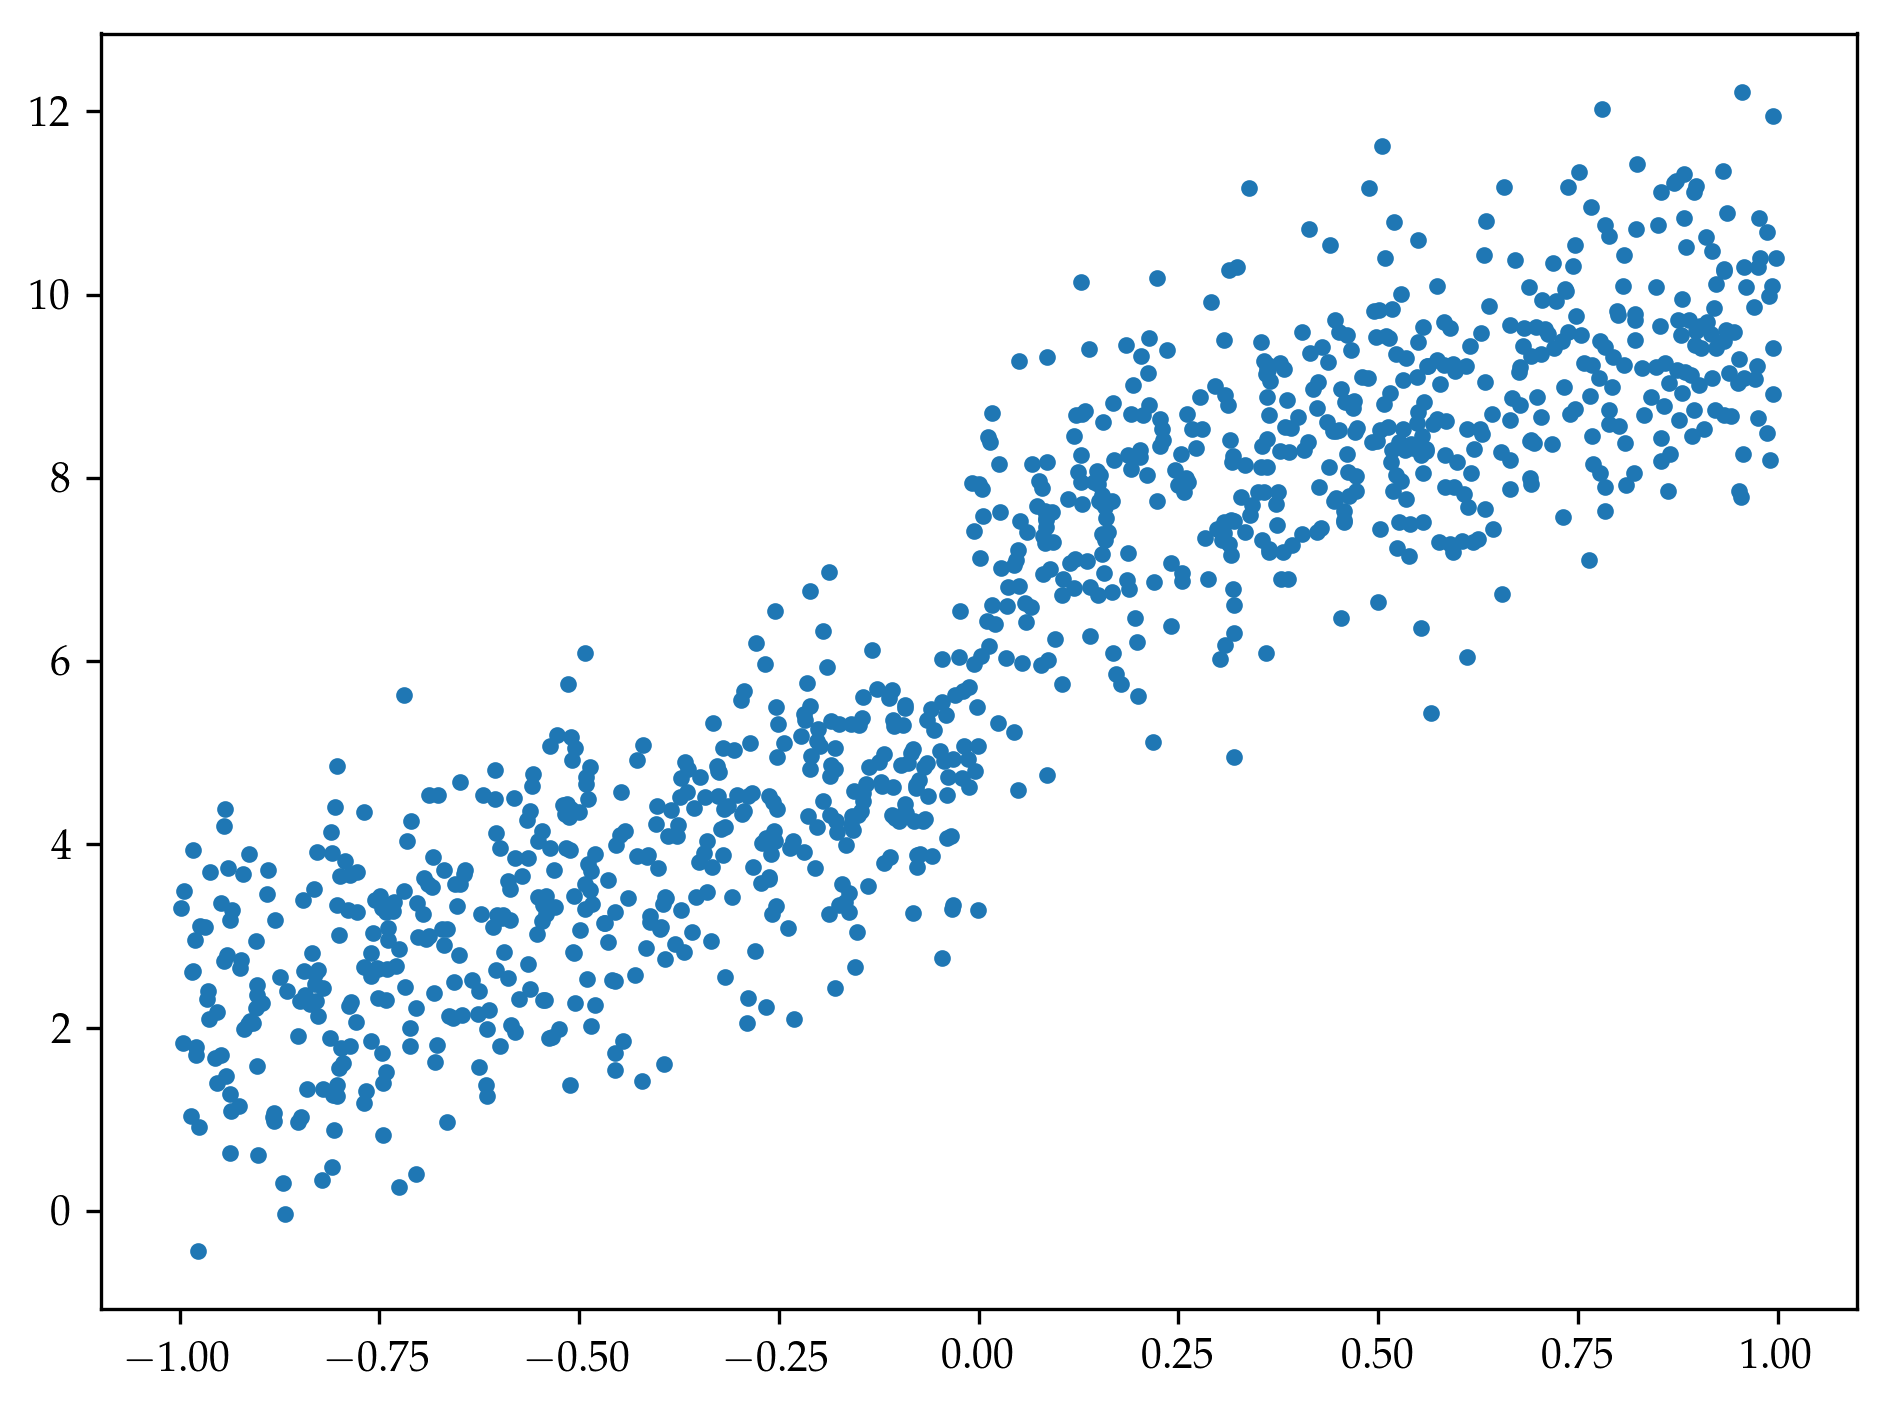

PyObject <matplotlib.collections.PathCollection object at 0x13b14b208>

In [6]:
plt.scatter(x, y, marker=".")

In [7]:
function llr(x::Vector, y::Vector, polydeg::Int, xfit::Float64, bandwidth::Float64)
    n = length(y)
    X = Matrix{Float64}(n, polydeg+1)
    for deg in 0:polydeg
        X[:,deg+1] = x.^deg
    end
    triangular_kernel = (x1,x2,bw) -> max(1-abs(x1-x2)/bw, 0.0)
    w = triangular_kernel.(x, xfit, bandwidth)
    Xfit = [xfit^deg for deg in 0:polydeg]
    XtWX = X' * (w .* X)
    weights = (w .* X) * (XtWX \ Xfit)
    mu_fit = dot(weights, y)
    return weights, mu_fit
end

llr (generic function with 1 method)

In [31]:
bw = IR_bandwidth(x, y, 1)

0.30922736150617486

In [32]:
xx = linspace(minimum(x),maximum(x),1000)
mu_xx = zeros(xx)
@time for (i,xfit) in enumerate(xx)
    same_side = sign(xfit) .== sign.(x)
    w, mu = llr(x[same_side], y[same_side], 1, xfit, bw)
    mu_xx[i] = mu
end 

  0.093851 seconds (69.19 k allocations: 53.652 MiB, 13.63% gc time)


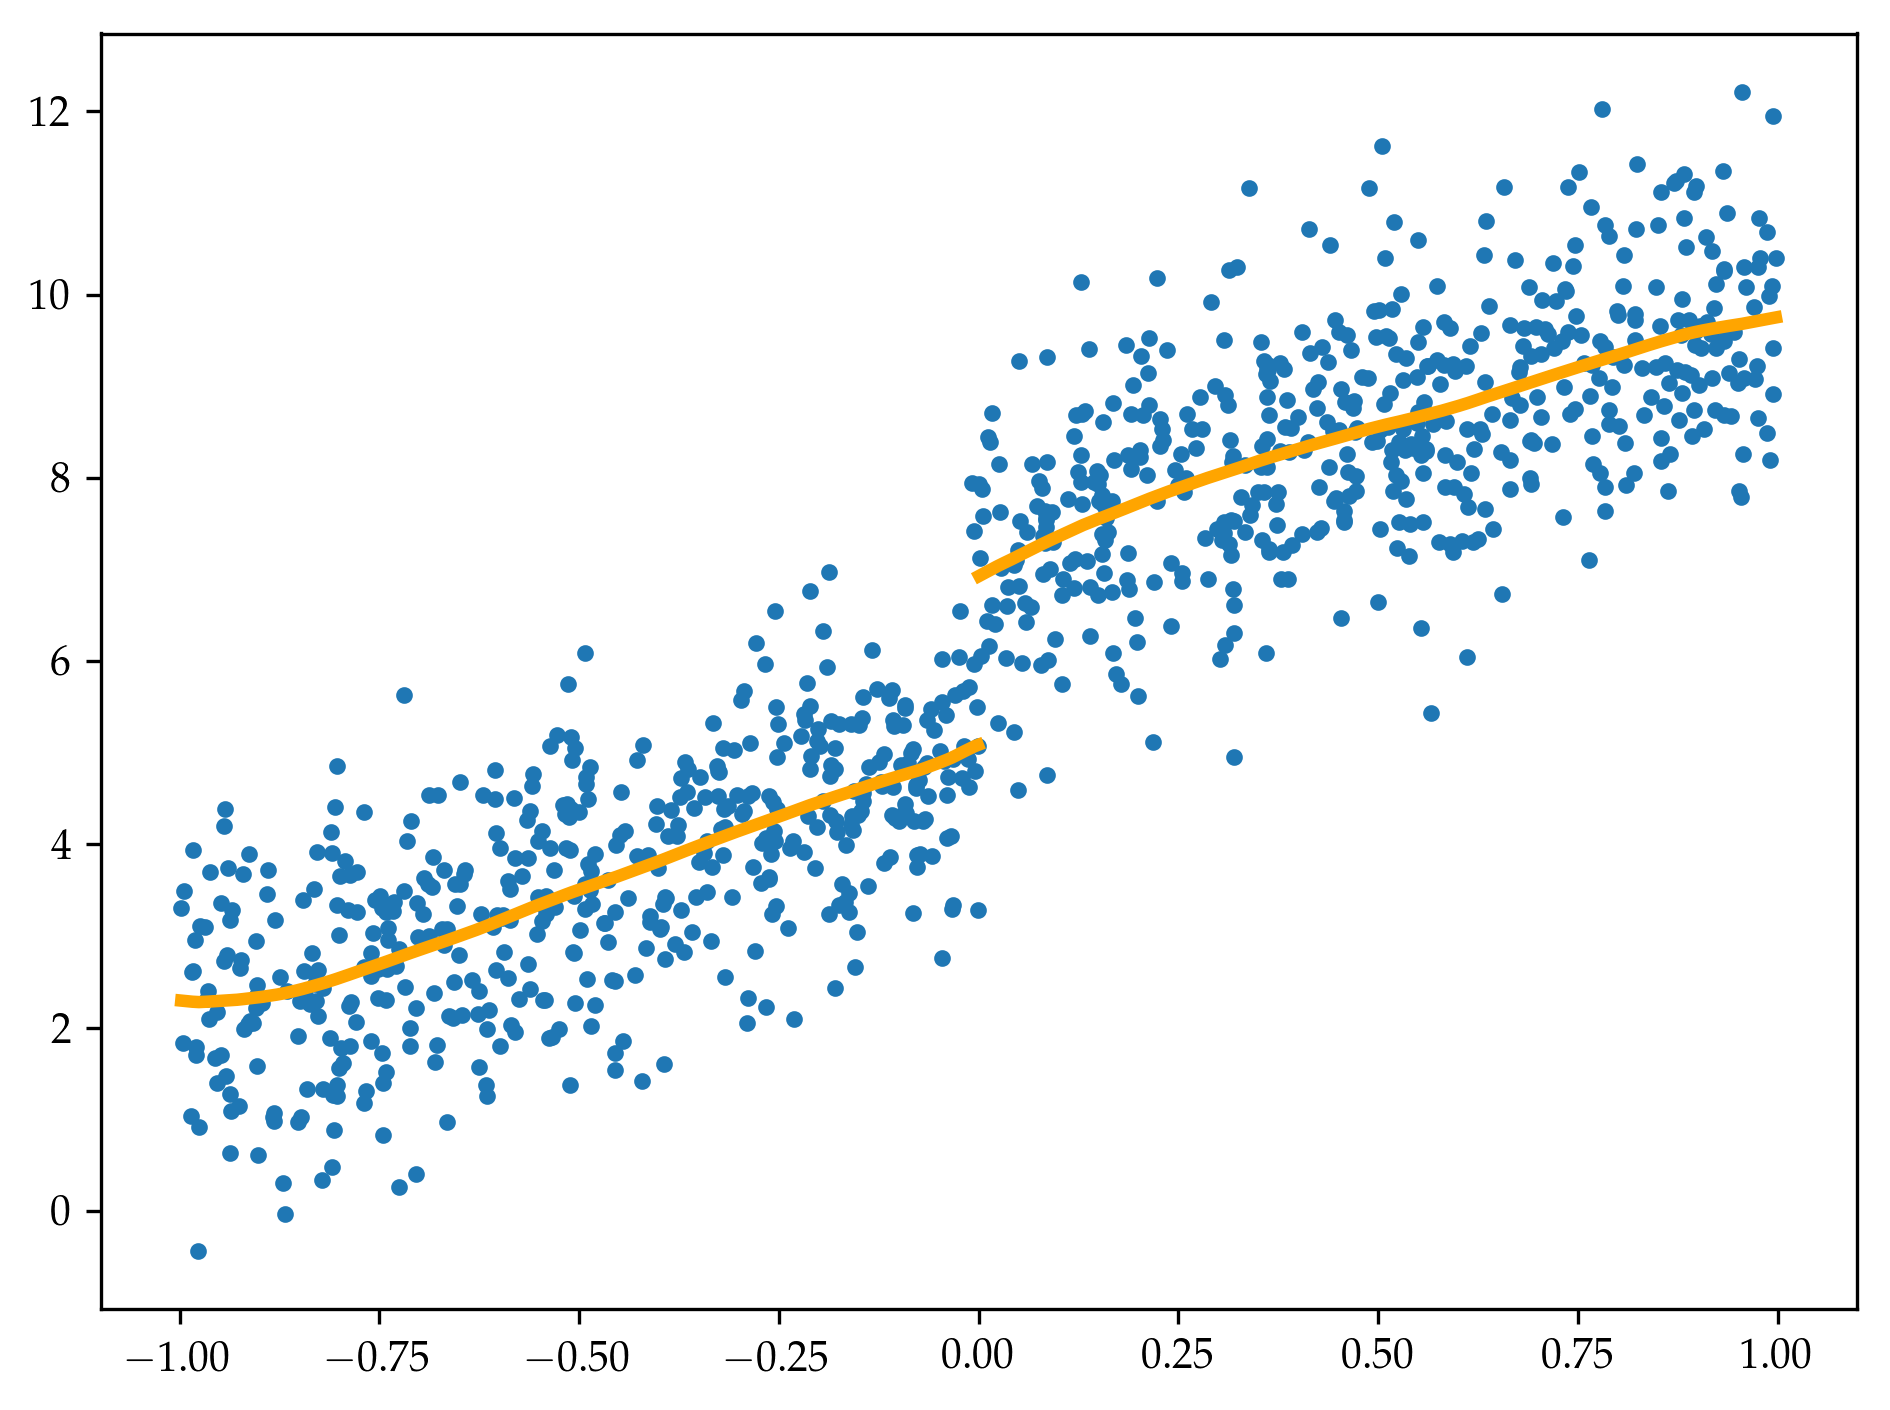

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13eeb3470>

In [33]:
plt.scatter(x, y, marker=".")
plt.plot(xx[xx.<=0], mu_xx[xx.<=0], color="orange", linewidth=3)
plt.plot(xx[xx.>0], mu_xx[xx.>0], color="orange", linewidth=3)

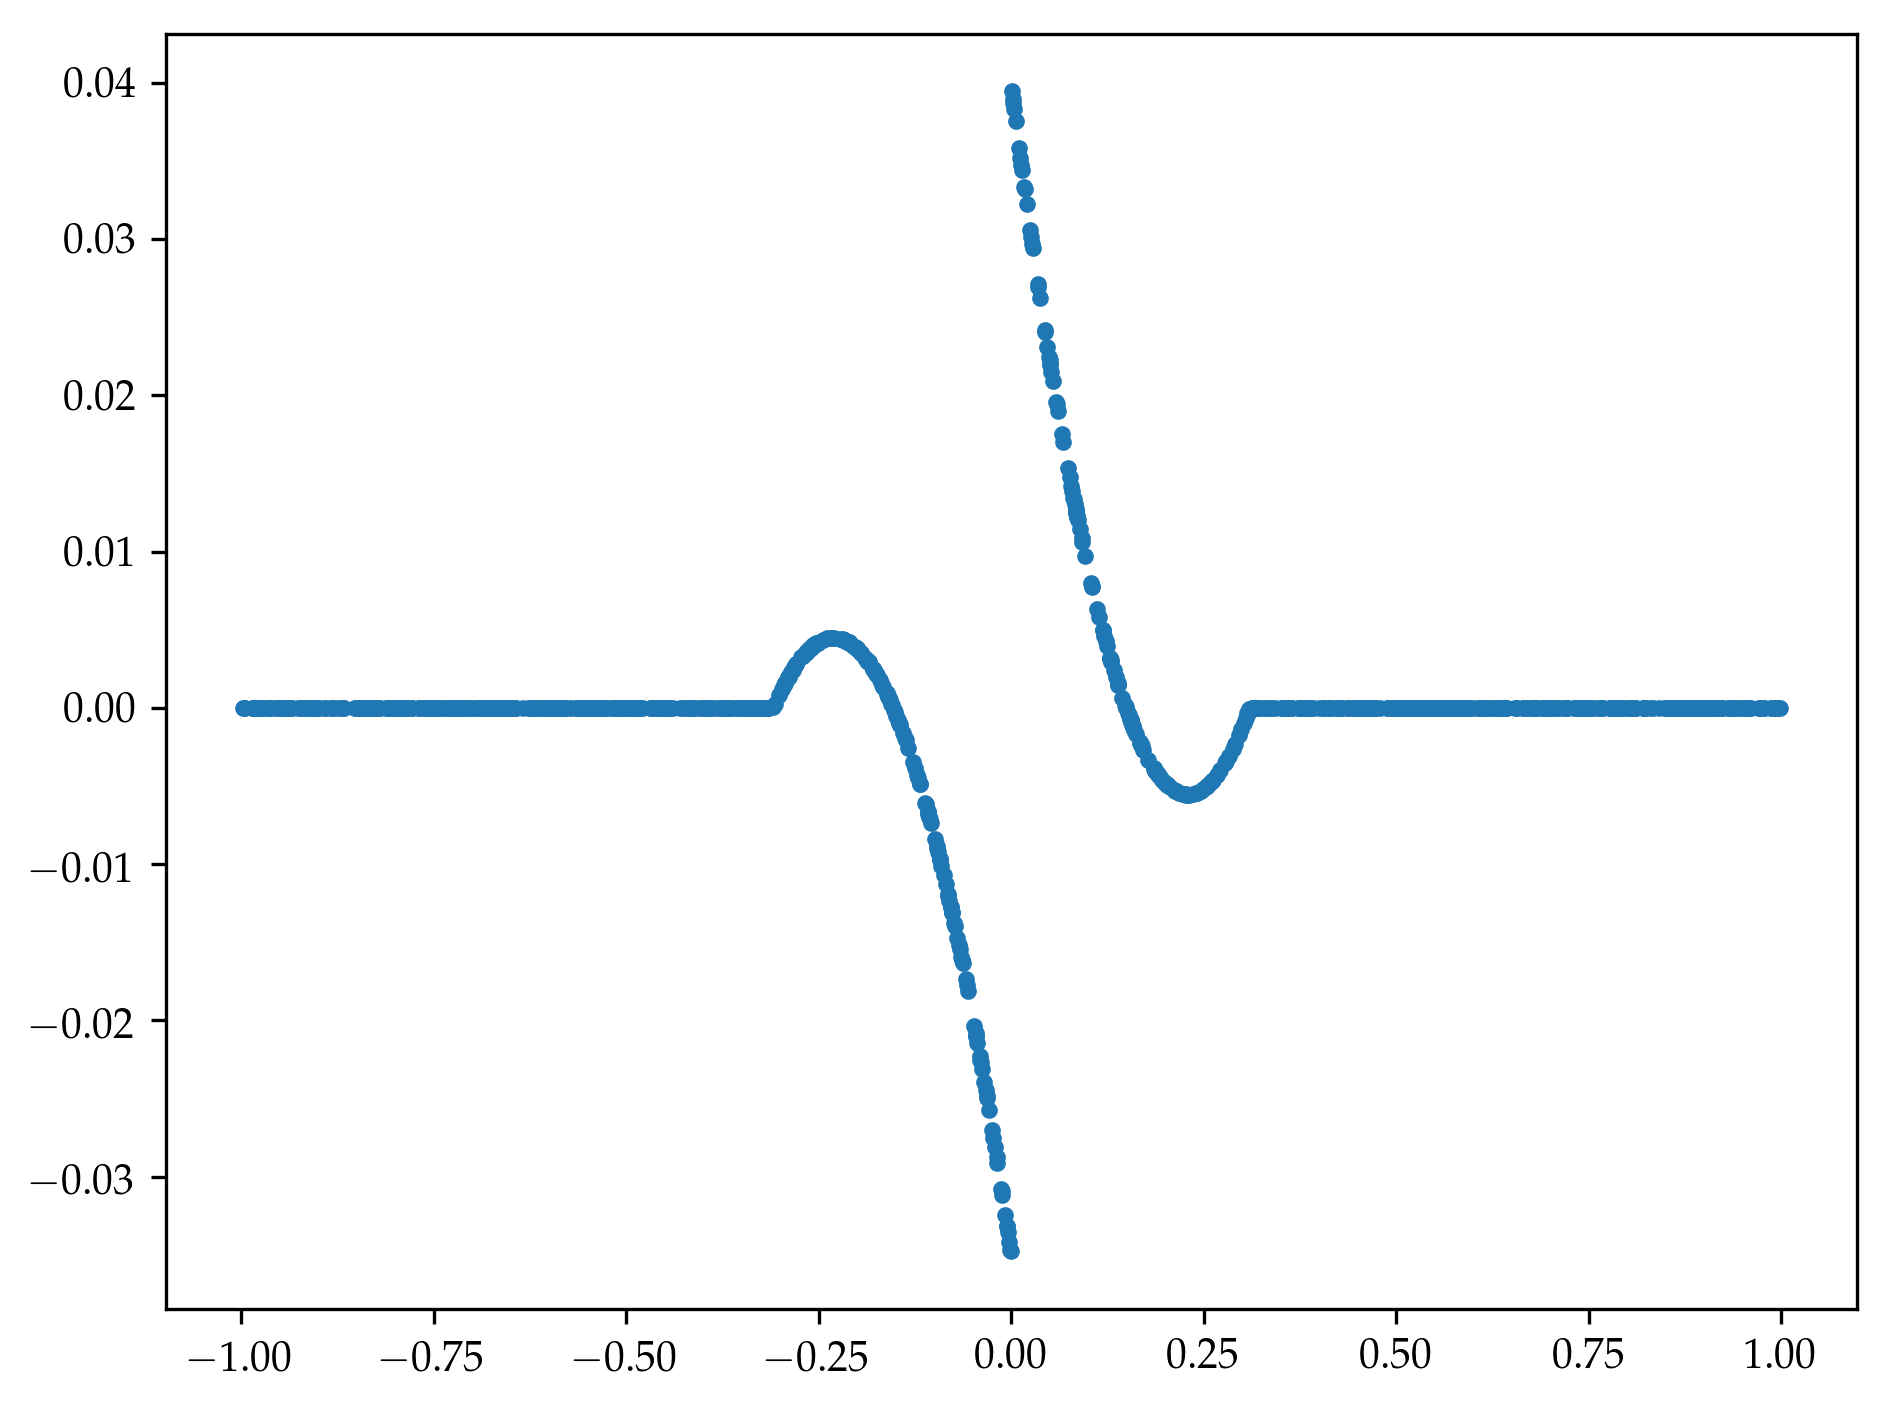

In [34]:
llr_out = llr_rdd(x, y, 1)
plt.plot(x, llr_out.weights, ".")
;

In [35]:
llr_out.τhat

1.8379412346074906

In [25]:
R"library(rdrobust)"
R"summary(rdrobust($y, $x, p=1, bwselect=\"mserd\"))"

Call: rdrobust

Number of Obs.                 1000
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 497         503
Eff. Number of Obs.            165         150
Order est. (p)                   1           1
Order bias  (p)                  2           2
BW est. (h)                  0.309       0.309
BW bias (b)                  0.472       0.472
rho (h/b)                    0.656       0.656

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     1.838     0.249     7.387     0.000     [1.350 , 2.326]     
        Robust         -         -     6.054     0.000     [1.219 , 2.386]     


RCall.RObject{RCall.NilSxp}
NULL
